<a href="https://colab.research.google.com/github/MartaPCastillo/Simulacion-I/blob/main/Ejercicio_Cami%C3%B3n_de_Transporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Camión de Transporte  

## Ejercicio 1

La empresa TIBASA (fabricante de tinas de baño) tiene asignado un camión especial para el transporte de tinas terminadas. Dicho camión transporta diariamente 5 tinas.

El peso de cada tina sigue la siguiente distribución de probabilidad (imagen del ejercicio que se encuentra en classroom).

Si la capacidad del camión es de una tonelada, ¿cuál es la probabilidad de que el peso de las tinas exceda la capacidad del camión?

1. Analíticamente.
2. Mediante simulación.

#Analíticamente:

Sea:

a = 190

b = 210

c = 230

$X_i \sim$ Tri(a,b,c): peso

Condición: $x_1 + x_2 + x_3 + x_4 + x_5 < 1000$

$f(x)= \left\{ \begin{array}{lcc} \dfrac{1}{400}(x-190) & si & 190 \leq x < 210 \\ \\ -\dfrac{1}{400}(x-230) & si & 210 \leq x < 230 \end{array} \right.$

$\mu = E[x]= \dfrac{a + b + c}{3} = \dfrac{190 + 210 + 230}{3} = \dfrac{630}{3} = 210$

$\sigma^2= Var[x]= \dfrac{a^2 + b^2 + c^2 - ab - ac- bc}{18} =  \dfrac{(190)^2 + (210)^2 + (230)^2 - (190)(210) - (190)(230) - (210)(230)}{18} =  \dfrac{200}{3} \approx 66.67$

Queremos calcular: $P(x_1 + x_2 + x_3 + x_4 + x_5 < 1000)$

Usamos el teorema del límite central:

$
\lim_{n \to \infty}(\dfrac{x_1 + x_2 + ... + x_n - n\mu}{\sigma \sqrt{n}} < x ) = \Phi (x)
$

(Válido para 4 $\leq$ n)

Reescribimos

$
\lim_{n \to \infty}(\dfrac{x_1 + x_2 + x_3 + x_4 + x_5 - (5(210))}{\sqrt{\dfrac{200}{3}} \cdot \sqrt{5}} < \dfrac{1000(5(210))}{\sqrt{\dfrac{200}{3}} \cdot \sqrt{5}} )
$

donde

$\dfrac{x_1 + x_2 + x_3 + x_4 + x_5 - (5(210))}{\sqrt{\dfrac{200}{3}} \cdot \sqrt{5}} = z$

y

$\dfrac{1000(5(210))}{\sqrt{\dfrac{200}{3}} \cdot \sqrt{5}} = -2.73$

de forma que

$P(z < -2.73) = 0.9969 = 99.69%$

#Por simulación

Tenemos la función de distribución acumulada

$F(x)= \left\{ \begin{array}{lcc} \dfrac{(x-190)^2}{800} & si & 190 \leq x < 210 \\ \\ 1 - \dfrac{(230 - x)^2}{400} & si & 210 \leq x < 230 \end{array} \right.$

Por el método de la transformada inversa tenemos:

$F(u)= \left\{ \begin{array}{lcc} 190 + 20\sqrt{2u} & si & 0 \leq x < 0.5 \\ \\ 230 - 20\sqrt{1-u} & si & 0.5 \leq x < 1 \end{array} \right.$

In [2]:
import random                                   # importamos el módulo random
import numpy as np                              # importamos numpy con un alias (np)
import matplotlib.pyplot as plt                 # ídem
#from random import expovariate, gauss
from statistics import mean, median, variance, stdev      # exportamos funciones especificas de statistic

In [4]:
def camion_transporte(n):
    lista = []
    for i in range(n):
        u=random.random()
        if 0 <= u < 0.5:
           X = (20*np.sqrt(2*u)) + 190
        else:
           X = 230 - (20*np.sqrt(1-u))
        lista.append(X)
    return lista

In [6]:
def camion_transporte(a=190,b=230,c=210,N=1000):
    lista = []
    for i in range(N):
        contador = 0
        u_1=random.triangular(a,b,c)
        u_2=random.triangular(a,b,c)
        u_3=random.triangular(a,b,c)
        u_4=random.triangular(a,b,c)
        u_5=random.triangular(a,b,c)
        if u_1 + u_2 + u_3 + u_4 + u_5 > 1000:
          contador = contador + 1
          prob = contador / N
          lista.append(prob)
          plt.plot(lista)
    return lista

In [10]:
def camion_transportee(a=190,b=230,c=210,N=1000):
    lista = []
    lista2 = []
    u =[]
    for i in range(N):
        contador = 0
        for j in range (5):
          u[j]=random.triangular(a,b,c)
          if u[0] + u[1] + u[2] + u[3] + u[4] > 1000:
             if 0 <= u[j] < 0.5:
                X = (20*np.sqrt(2*u)) + 190
             else:
                X = 230 - (20*np.sqrt(1-u))
             lista2.append(X)
             contador = contador + 1
             prob = contador / N
             lista.append(prob)
             plt.plot(lista)
    return lista, lista2

In [24]:
def camion_transportee(a=190,b=230,c=210,N=1000):
    lista = []
    lista2 = []
    u =[]
    for i in range(N):
        contador = 0
        for j in range (5):
            valor = random.triangular(a,b,c)
            u.append(valor)
            # Check the sum after appending the value and only if you have 5 values
            if len(u) == 5 and u[0] + u[1] + u[2] + u[3] + u[4] > 1000:
                if 0 <= u[j] < 0.5:
                    X = (20*np.sqrt(2*u[j])) + 190
                else:
                    X = 230 - (20*np.sqrt(1-u[j]))
                lista2.append(X)
            contador = contador + 1
            prob = contador / N
            lista.append(prob)
    return lista, plt.plot(lista)

<ipython-input-24-6e0e2e5fd24a>:15: RuntimeWarning: invalid value encountered in sqrt
  X = 230 - (20*np.sqrt(1-u[j]))


([0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
  0.002,
  0.003,
  0.004,
  0.005,
  0.001,
 

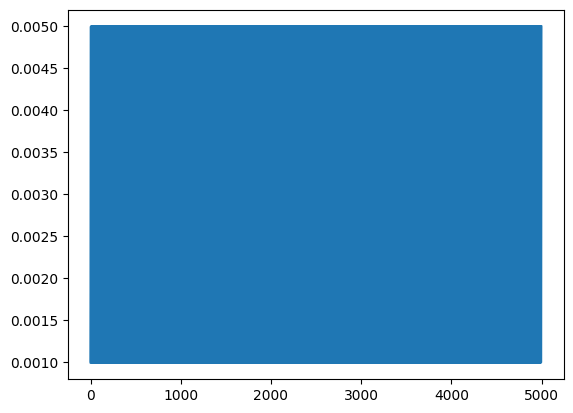

In [25]:
camion_transportee()

##Ejercicio 2

Analice la conveniencia de adquirir un nuevo camión. Para tal propósito, suponga que cada vez que la capacidad del camión es excedida una tina es enviada a través de otra
compañía a un costo de \$200.
También suponga que el costo promedio anual de un nuevo camión es de  \$60, 000. Si se trabaja 5 días a la semana y 52 semanas al año, ¿cuál de las dos alternativas mencionadas es la más atractiva?

1. Analíticamente.
2. Mediante simulación.

#Analíticamente

1 año  5 días x 52 semanas = 260 días

260 días -- 100%
   x     -- 99.7%

$\therefore$ x = 259 días

Costo = 259 x \$200 = 51,800

Concluimos que conviene más enviar la tina a través de otra compañía.

#Por simulación

In [ ]:
def camion_transporte_2(a=190,b=210,c=230,N=1000):
    lista = []
    costo = 0
    for i in range(N):
        contador = 0
        u_1=np.random.triangular(a,b,c)
        u_2=np.random.triangular(a,b,c)
        u_3=np.random.triangular(a,b,c)
        u_4=np.random.triangular(a,b,c)
        u_5=np.random.triangular(a,b,c)
        if u_1 + u_2 + u_3 + u_4 + u_5 > 1000:
           contador = contador + 1
           prob = contador / N
           costo = costo + 200
           lista.append(prob)
           plt.plot(costo)
           plt.plot(lista)
    return lista, costo

([0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
 

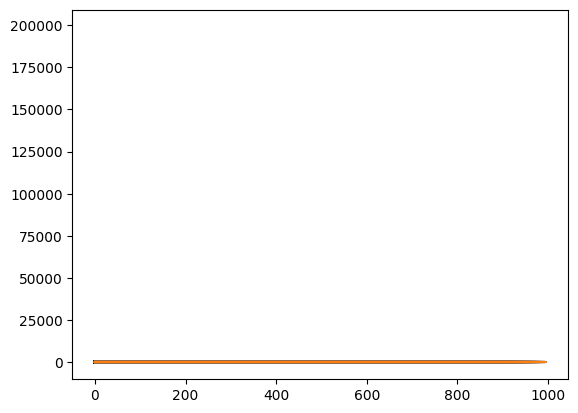

In [ ]:
camion_transporte_2()